Importing The Libraries

In [0]:
import numpy as np
import pandas as pd

loading the dataset

In [3]:
from google.colab import files
files=files.upload()

Saving 5_a.csv to 5_a.csv


In [4]:
data=pd.read_csv('5_a.csv')
data.head(10)

,y,proba
0,1,0.637387
1,1,0.635165
2,1,0.766586
3,1,0.724564
4,1,0.889199
5,1,0.601600
6,1,0.666323
7,1,0.567012
8,1,0.650230
9,1,0.829346


In [5]:
def fun1(x,positive,negative):
  if x == 1.0:
    positive+=1
  if x== 0.0:
    negative+=1
  return positive,negative
positive=0
negative=0
data_1_0= data['y']
for i in range(len(data_1_0)):
  positive,negative=fun1(data_1_0.loc[i],positive,negative)
print("no.of positive point in the dataset given in the feature y :",positive)
print("no.of negative point in the dataset given in the feature y :",negative)

no.of positive point in the dataset given in the feature y : 10000
no.of negative point in the dataset given in the feature y : 100


Computing Confusion Matrix

In [6]:
TN=0
FN=0
FP=0
TP=0
for i in range(len(data)):
  if data.loc[i,'proba']<0.5 :
    if data.loc[i,'y']==0.0:
      TN=TN+1
    else :
      FN=FN+1
  else:
    if data.loc[i,'y']==0.0:
      FP=FP+1
    else:
      TP=TP+1
print("#TRUE NEGATIVE :",TN)
print("#FALSE NEGATIVE :",FN)
print("#FALSE POSITIVE :",FP)
print("#TRUE POSITIVE ",TP)

#TRUE NEGATIVE : 0
#FALSE NEGATIVE : 0
#FALSE POSITIVE : 100
#TRUE POSITIVE  10000


Computing Precision

In [0]:
Precision= TP/(TP+FP)
print("Precision:",Precision)

Precision: 0.9900990099009901


Computing Recall

In [0]:
Recall= TP/(TP+FN)
print("Recall:",Recall)

Recall: 1.0


Computing F1 Score

In [0]:
F1_Score=2*(Precision*Recall)/(Precision+Recall)
print("F1 Score",F1_Score)

F1 Score 0.9950248756218906


Computing Accuracy Score

In [0]:
Acc_score=(TN+TP)/(TN+FN+TP+FP)
print("Accuracy score",Acc_score)

Accuracy score 0.9900990099009901


Computing AUC

In [7]:
data.sort_values(by=['proba'], inplace=True, ascending=False)
data.head(5)

,y,proba
1664,1,0.899965
2099,1,0.899828
1028,1,0.899825
9592,1,0.899812
8324,1,0.899768


In [0]:
TPR_1=[]
FPR_1=[]
for i in range(len(data)):
  thresold=data.loc[i,'proba']
  TN=0
  FN=0
  FP=0
  TP=0
  TPR=0
  FPR=0
  for j in range(len(data)):
    if data.loc[j,'proba']>=thresold:
      if data.loc[j,'y']==1.0:
        TP=TP+1
      else:
        FP=FP+1
    else:
      if data.loc[j,'y']==1.0:
        FN=FN+1
      else:
        TN=TN+1
  TPR=TP/(FN+TP)
  FPR=FP/(FP+TN)
  TPR_1.append(TPR)
  FPR_1.append(FPR)

In [10]:
TPR_1.sort()
FPR_1.sort()
pAUC = np.trapz(TPR_1,FPR_1)
pAUC

0.48829900000000004

In [0]:
TPR_1=np.array(TPR_1)
FPR_1=np.array(FPR_1)

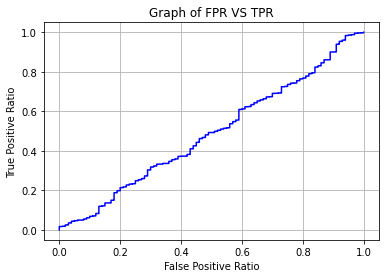

In [12]:
import matplotlib.pyplot as plt
plt.plot(FPR_1,TPR_1,color='b')
plt.xlabel("False Positive Ratio")
plt.ylabel("True Positive Ratio")
plt.title("Graph of FPR VS TPR")
plt.grid(True)
plt.show()

In [13]:
from google.colab import files
files=files.upload()

Saving 5_b.csv to 5_b.csv


In [14]:
data1=pd.read_csv('5_b.csv')
data1.head(10)

,y,proba
0,0,0.281035
1,0,0.465152
2,0,0.352793
3,0,0.157818
4,0,0.276648
5,0,0.190260
6,0,0.320328
7,0,0.435013
8,0,0.284849
9,0,0.427919


In [15]:
def fun2(x,positive1,negative1):
  if x ==0.0:
    negative1+=1
  else:
    positive1+=1
  return positive1,negative1
positive1=0
negative1=0
data_2_0= data1['y']
for i in range(len(data_2_0)):
  positive1,negative1=fun2(data_2_0.loc[i],positive1,negative1)
print("no.of positive point in the dataset given in the feature y :",positive1)
print("no.of negative point in the dataset given in the feature y :",negative1)

no.of positive point in the dataset given in the feature y : 100
no.of negative point in the dataset given in the feature y : 10000


In [16]:
TN=0
FN=0
FP=0
TP=0
for i in range(len(data1)):
  if data1.loc[i,'proba']<0.5 :
    if data1.loc[i,'y']==0.0:
      TN=TN+1
    else :
      FN=FN+1
  else:
    if data1.loc[i,'y']==0.0:
      FP=FP+1
    else:
      TP=TP+1
print("#TRUE NEGATIVE :",TN)
print("#FALSE NEGATIVE :",FN)
print("#FALSE POSITIVE :",FP)
print("#TRUE POSITIVE ",TP)

#TRUE NEGATIVE : 9761
#FALSE NEGATIVE : 45
#FALSE POSITIVE : 239
#TRUE POSITIVE  55


In [0]:
Precision= TP/(TP+FP)
print("Precision:",Precision)

Precision: 0.1870748299319728


In [0]:
Recall= TP/(TP+FN)
print("Recall:",Recall)

Recall: 0.55


In [0]:
F1_Score=2*(Precision*Recall)/(Precision+Recall)
print("F1 Score",F1_Score)

F1 Score 0.2791878172588833


In [0]:
Acc_score=(TN+TP)/(TN+FN+TP+FP)
print("Accuracy score",Acc_score)

Accuracy score 0.9718811881188119


In [17]:
data1.sort_values(by=['proba'], inplace=True, ascending=False)
data1.head(5)

,y,proba
8446,1,0.595294
1978,1,0.594808
1657,1,0.592198
110,1,0.590171
8578,1,0.588718


In [0]:
TPR_2=[]
FPR_2=[]
for i in range(len(data1)):
  thresold=data1.loc[i,'proba']
  TN=0
  FN=0
  FP=0
  TP=0
  TPR=0
  FPR=0
  for j in range(len(data1)):
    if data1.loc[j,'proba']>=thresold:
      if data1.loc[j,'y']==1.0:
        TP=TP+1
      else:
        FP=FP+1
    else:
      if data1.loc[j,'y']==1.0:
        FN=FN+1
      else:
        TN=TN+1
  TPR=TP/(FN+TP)
  FPR=FP/(FP+TN)
  TPR_2.append(TPR)
  FPR_2.append(FPR)

In [19]:
TPR_2.sort()
FPR_2.sort()
pAUC2 = np.trapz(TPR_2,FPR_2)
pAUC2

0.9377570000000001

In [0]:
TPR_2=np.array(TPR_2)
FPR_2=np.array(FPR_2)

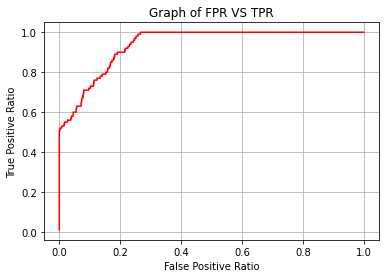

In [21]:
import matplotlib.pyplot as plt
plt.plot(FPR_2,TPR_2,color='r')
plt.xlabel("False Positive Ratio")
plt.ylabel("True Positive Ratio")
plt.title("Graph of FPR VS TPR")
plt.grid(True)
plt.show()

In [23]:
from google.colab import files
files=files.upload()

Saving 5_c.csv to 5_c.csv


In [24]:
data2=pd.read_csv('5_c.csv')
data2.head(10)

,y,prob
0,0,0.458521
1,0,0.505037
2,0,0.418652
3,0,0.412057
4,0,0.375579
5,0,0.595387
6,0,0.370288
7,0,0.299273
8,0,0.297000
9,0,0.266479


In [25]:
data2.sort_values(by=['prob'], inplace=True, ascending=False)
data2.head(5)

,y,prob
2634,1,0.957747
2548,1,0.951437
2447,1,0.948638
2788,1,0.944094
2456,1,0.941113


In [0]:
ans={}
for i in range(len(data2)):
  thresold=data2.loc[i,'prob']
  TN=0
  FN=0
  FP=0
  TP=0
  for j in range(len(data2)):
    if data2.loc[j,'prob']>=thresold:
      if data2.loc[j,'y']==1.0:
        TP=TP+1
      else:
        FP=FP+1
    else:
      if data2.loc[j,'y']==1.0:
        FN=FN+1
      else:
        TN=TN+1
  Ans=500*FN+100*FP
  ans[thresold]=Ans

In [29]:
for key, value in ans.items():
  if value==141000:
    print('best threshold :', key)

best threshold : 0.230039028


In [0]:
from google.colab import files
files=files.upload()

Saving 5_d.csv to 5_d.csv


In [0]:
data3=pd.read_csv('5_d.csv')
data3.head(10)

,y,pred
0,101,100
1,120,100
2,131,113
3,164,125
4,154,152
5,133,153
6,148,139
7,172,145
8,153,162
9,162,154


MAPE

mean absolute percentage error the name it self says that it is the mean(abs(error)).we will not use the traditional MAPE formulae we
use modified MAPE formulae to get rid of it is not divisible by 0 error.

In [0]:
error=0
actual=0
for i in range(len(data3)):
  error=error+abs(data3.loc[i,'pred']-data3.loc[i,'y'])
  actual=actual+data3.loc[i,'y']
print((error/actual)*100)

12.91202994009687


R^2 ERROR

In [0]:
SS_total=0
SS_pred=0
mean=actual/len(data3)
for i in range(len(data3)):
  SS_total=SS_total+((data3.loc[i,'y']-mean)**2)
  SS_pred+=((data3.loc[i,'pred']-data3.loc[i,'y'])**2)
print(1-(SS_pred/SS_total))


0.9563582786990964


Mean Squared Error

In [0]:
MSE=0
ans=0
for i in range(len(data3)):
  ans+=((data3.loc[i,'y']-data3.loc[i,'pred'])**2)
MSE=ans/len(data3)
print(MSE)


177.16569974554707
